1.Extracting and downloading the MNIST dataset

In [68]:
from __future__ import print_function
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 




Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


2.Setting up the parameters to read the model

In [69]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 100
display_step = 1
model_path = "/tmp/model.ckpt"

# Network Parameters
n_hidden_1 = 15 # 1st layer number of neurons

num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

3.Storing the weights and bias of the input and hidden layers

In [70]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

4.Defined the model for one single hidden layer

In [71]:

# Create model1
def neural_net(x):
    # Hidden fully connected layer with 15 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    
   
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

5.Defined the model for two hidden layers

In [72]:

# Create model2
def neural_net2(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

6.calculating the logistic or sigmoid function

In [73]:

# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
validate_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

7.Saving the  training model

In [74]:
saver = tf.train.Saver()

8.Using tensorflow session calculated the training and validation accuracy within each epoch and plotted the result in the form of a graph

In [81]:
# Start training
with tf.Session() as sess:
    lossDifference = []
    epochs = np.arange(1,501,1)
    train_accuracy = []
    validate_accuracy = []
    

    # Run the initializer
    sess.run(init)
   

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        batch_x1, batch_y1 = mnist.validation.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            lossdiff = loss
            lossDifference = np.append(lossDifference,lossdiff)
            train_accuracy = np.append(train_accuracy,acc)
        sess.run(validate_op, feed_dict={X: batch_x1, Y: batch_y1})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss1, acc1 = sess.run([loss_op, accuracy], feed_dict={X: batch_x1,
                                                                 Y: batch_y1})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss1) + ", validation Accuracy= " + \
                  "{:.3f}".format(acc1))
            validate_accuracy = np.append(validate_accuracy,acc1)
    print("Optimization Finished!")
     # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
    
   
    
    

Step 1, Minibatch Loss= 28.0542, Training Accuracy= 0.280
Step 1, Minibatch Loss= 24.5798, validation Accuracy= 0.170
Step 2, Minibatch Loss= 15.6011, Training Accuracy= 0.410
Step 2, Minibatch Loss= 10.5032, validation Accuracy= 0.510
Step 3, Minibatch Loss= 10.9863, Training Accuracy= 0.560
Step 3, Minibatch Loss= 8.8748, validation Accuracy= 0.570
Step 4, Minibatch Loss= 11.2984, Training Accuracy= 0.550
Step 4, Minibatch Loss= 9.1966, validation Accuracy= 0.680
Step 5, Minibatch Loss= 5.9918, Training Accuracy= 0.690
Step 5, Minibatch Loss= 4.2039, validation Accuracy= 0.720
Step 6, Minibatch Loss= 7.5136, Training Accuracy= 0.600
Step 6, Minibatch Loss= 4.9988, validation Accuracy= 0.720
Step 7, Minibatch Loss= 6.2984, Training Accuracy= 0.640
Step 7, Minibatch Loss= 3.6735, validation Accuracy= 0.800
Step 8, Minibatch Loss= 4.2697, Training Accuracy= 0.740
Step 8, Minibatch Loss= 3.2482, validation Accuracy= 0.800
Step 9, Minibatch Loss= 3.2351, Training Accuracy= 0.780
Step 9, M

Step 79, Minibatch Loss= 0.7776, validation Accuracy= 0.850
Step 80, Minibatch Loss= 0.8617, Training Accuracy= 0.840
Step 80, Minibatch Loss= 0.5196, validation Accuracy= 0.860
Step 81, Minibatch Loss= 0.6183, Training Accuracy= 0.900
Step 81, Minibatch Loss= 0.7115, validation Accuracy= 0.870
Step 82, Minibatch Loss= 1.0415, Training Accuracy= 0.860
Step 82, Minibatch Loss= 0.5259, validation Accuracy= 0.880
Step 83, Minibatch Loss= 0.4037, Training Accuracy= 0.890
Step 83, Minibatch Loss= 0.1916, validation Accuracy= 0.940
Step 84, Minibatch Loss= 0.9317, Training Accuracy= 0.870
Step 84, Minibatch Loss= 0.7120, validation Accuracy= 0.850
Step 85, Minibatch Loss= 0.7368, Training Accuracy= 0.840
Step 85, Minibatch Loss= 0.7780, validation Accuracy= 0.850
Step 86, Minibatch Loss= 0.3540, Training Accuracy= 0.860
Step 86, Minibatch Loss= 0.4868, validation Accuracy= 0.880
Step 87, Minibatch Loss= 0.6206, Training Accuracy= 0.880
Step 87, Minibatch Loss= 0.6471, validation Accuracy= 0.

Step 151, Minibatch Loss= 0.7157, Training Accuracy= 0.880
Step 151, Minibatch Loss= 0.3936, validation Accuracy= 0.900
Step 152, Minibatch Loss= 0.4528, Training Accuracy= 0.890
Step 152, Minibatch Loss= 0.3256, validation Accuracy= 0.900
Step 153, Minibatch Loss= 0.6388, Training Accuracy= 0.830
Step 153, Minibatch Loss= 0.5179, validation Accuracy= 0.910
Step 154, Minibatch Loss= 0.7393, Training Accuracy= 0.880
Step 154, Minibatch Loss= 0.7399, validation Accuracy= 0.860
Step 155, Minibatch Loss= 1.0889, Training Accuracy= 0.820
Step 155, Minibatch Loss= 0.3195, validation Accuracy= 0.900
Step 156, Minibatch Loss= 0.8981, Training Accuracy= 0.830
Step 156, Minibatch Loss= 0.4952, validation Accuracy= 0.880
Step 157, Minibatch Loss= 0.7422, Training Accuracy= 0.870
Step 157, Minibatch Loss= 0.6529, validation Accuracy= 0.820
Step 158, Minibatch Loss= 0.5680, Training Accuracy= 0.850
Step 158, Minibatch Loss= 0.4286, validation Accuracy= 0.870
Step 159, Minibatch Loss= 0.7559, Traini

Step 233, Minibatch Loss= 0.6760, validation Accuracy= 0.870
Step 234, Minibatch Loss= 1.1819, Training Accuracy= 0.870
Step 234, Minibatch Loss= 0.6456, validation Accuracy= 0.890
Step 235, Minibatch Loss= 0.9067, Training Accuracy= 0.830
Step 235, Minibatch Loss= 0.5936, validation Accuracy= 0.850
Step 236, Minibatch Loss= 0.8339, Training Accuracy= 0.800
Step 236, Minibatch Loss= 0.2308, validation Accuracy= 0.930
Step 237, Minibatch Loss= 0.8119, Training Accuracy= 0.870
Step 237, Minibatch Loss= 0.4882, validation Accuracy= 0.880
Step 238, Minibatch Loss= 0.7981, Training Accuracy= 0.850
Step 238, Minibatch Loss= 0.2875, validation Accuracy= 0.900
Step 239, Minibatch Loss= 0.5890, Training Accuracy= 0.890
Step 239, Minibatch Loss= 0.2462, validation Accuracy= 0.920
Step 240, Minibatch Loss= 0.5351, Training Accuracy= 0.860
Step 240, Minibatch Loss= 0.5611, validation Accuracy= 0.890
Step 241, Minibatch Loss= 0.6364, Training Accuracy= 0.860
Step 241, Minibatch Loss= 0.3638, valida

Step 319, Minibatch Loss= 0.8625, Training Accuracy= 0.850
Step 319, Minibatch Loss= 0.7139, validation Accuracy= 0.840
Step 320, Minibatch Loss= 1.0380, Training Accuracy= 0.800
Step 320, Minibatch Loss= 0.4765, validation Accuracy= 0.850
Step 321, Minibatch Loss= 0.8896, Training Accuracy= 0.820
Step 321, Minibatch Loss= 0.3739, validation Accuracy= 0.900
Step 322, Minibatch Loss= 0.9195, Training Accuracy= 0.860
Step 322, Minibatch Loss= 0.6446, validation Accuracy= 0.870
Step 323, Minibatch Loss= 0.9319, Training Accuracy= 0.810
Step 323, Minibatch Loss= 0.8310, validation Accuracy= 0.850
Step 324, Minibatch Loss= 0.6711, Training Accuracy= 0.860
Step 324, Minibatch Loss= 0.5267, validation Accuracy= 0.930
Step 325, Minibatch Loss= 0.9321, Training Accuracy= 0.840
Step 325, Minibatch Loss= 0.5581, validation Accuracy= 0.880
Step 326, Minibatch Loss= 0.9531, Training Accuracy= 0.820
Step 326, Minibatch Loss= 0.7278, validation Accuracy= 0.850
Step 327, Minibatch Loss= 0.5023, Traini

Step 406, Minibatch Loss= 1.2317, Training Accuracy= 0.890
Step 406, Minibatch Loss= 0.6577, validation Accuracy= 0.820
Step 407, Minibatch Loss= 0.8874, Training Accuracy= 0.830
Step 407, Minibatch Loss= 0.7121, validation Accuracy= 0.900
Step 408, Minibatch Loss= 1.2158, Training Accuracy= 0.820
Step 408, Minibatch Loss= 0.9316, validation Accuracy= 0.860
Step 409, Minibatch Loss= 0.6440, Training Accuracy= 0.890
Step 409, Minibatch Loss= 0.5487, validation Accuracy= 0.910
Step 410, Minibatch Loss= 0.5300, Training Accuracy= 0.880
Step 410, Minibatch Loss= 0.8697, validation Accuracy= 0.870
Step 411, Minibatch Loss= 1.5609, Training Accuracy= 0.830
Step 411, Minibatch Loss= 1.0641, validation Accuracy= 0.810
Step 412, Minibatch Loss= 1.8647, Training Accuracy= 0.810
Step 412, Minibatch Loss= 0.4895, validation Accuracy= 0.930
Step 413, Minibatch Loss= 1.0771, Training Accuracy= 0.820
Step 413, Minibatch Loss= 0.4948, validation Accuracy= 0.880
Step 414, Minibatch Loss= 1.8315, Traini

Step 497, Minibatch Loss= 1.2438, Training Accuracy= 0.870
Step 497, Minibatch Loss= 0.1982, validation Accuracy= 0.910
Step 498, Minibatch Loss= 0.9544, Training Accuracy= 0.900
Step 498, Minibatch Loss= 0.5970, validation Accuracy= 0.900
Step 499, Minibatch Loss= 0.1516, Training Accuracy= 0.930
Step 499, Minibatch Loss= 0.3998, validation Accuracy= 0.910
Step 500, Minibatch Loss= 0.7950, Training Accuracy= 0.890
Step 500, Minibatch Loss= 0.4620, validation Accuracy= 0.910
Optimization Finished!
Model saved in file: /tmp/model.ckpt


9.plotted the LossDifference of training set at each epoch , Training accuracy vs epoch and validation accuracy vs epoch.

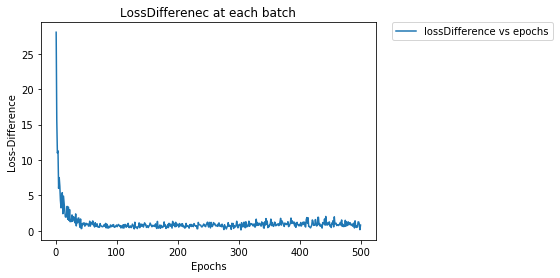

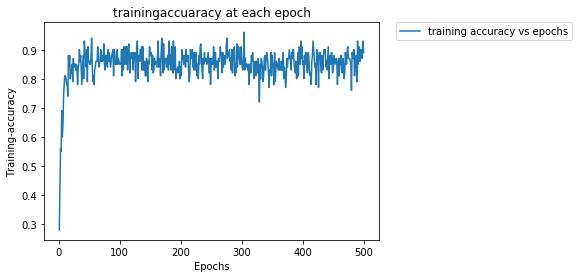

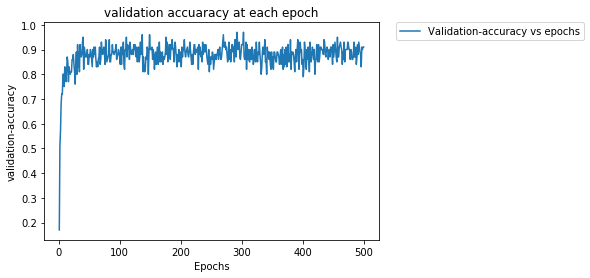

In [83]:
plt.figure(1)
plt.plot(epochs,lossDifference,label = "lossDifference vs epochs")
plt.title("LossDifferenec at each batch")
#Label the X and Y axes
plt.xlabel("Epochs")
plt.ylabel("Loss-Difference")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(2)
plt.plot(epochs,train_accuracy,label = "training accuracy vs epochs")
plt.title("trainingaccuaracy at each epoch")
#Label the X and Y axes
plt.xlabel("Epochs")
plt.ylabel("Training-accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(3)
plt.plot(epochs,validate_accuracy,label = "Validation-accuracy vs epochs")
plt.title("validation accuaracy at each epoch")
#Label the X and Y axes
plt.xlabel("Epochs")
plt.ylabel("validation-accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

10.restoring the saved session model to calculate it on testing set and have obtained an accuracy of 0.8634

In [84]:
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    load_path = saver.restore(sess, model_path)
    print("Model restored from file: %s" % save_path)
    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

Starting 2nd session...
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored from file: /tmp/model.ckpt
Testing Accuracy: 0.8634


11.Performed the grid search for one hidden layer with 15 and 25 number of hidden neurons and plotted the resulting graphs.

for a single hidden layer with no:of hidden nodes: 15
Step 500, Minibatch Loss= 2.2152, Training Accuracy= 0.840
Step 500, Minibatch Loss= 0.6678, validation Accuracy= 0.850
Optimization Finished!
Testing Accuracy: 0.7835


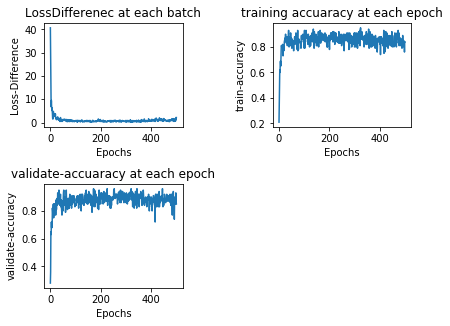

for a single hidden layer with no:of hidden nodes: 25
Step 500, Minibatch Loss= 4.9208, Training Accuracy= 0.790
Step 500, Minibatch Loss= 1.3921, validation Accuracy= 0.880
Optimization Finished!
Testing Accuracy: 0.8497


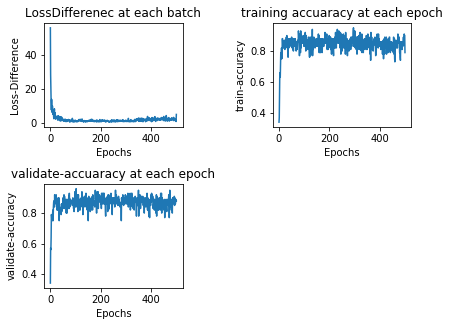

In [102]:
#Grid search for model 1 with one hidden layer

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 100
display_step = 1
model_path = "/tmp/model.ckpt"

# Network Parameters
n_hidden_1 = [15,25] # 1st layer number of neurons
for hidden in n_hidden_1:
    print("for a single hidden layer with no:of hidden nodes:" , hidden)
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)
    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, hidden])),
        'out': tf.Variable(tf.random_normal([hidden, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }
    logits = neural_net(X)
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)
    validate_op = optimizer.minimize(loss_op)
    # Evaluate model (with test logits, for dropout to be disabled)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    # Start training
    with tf.Session() as sess:
        lossDifference = []
        epochs = np.arange(1,501,1)
        train_accuracy = []
        validate_accuracy =[]
        # Run the initializer
        sess.run(init)
        for step in range(1, num_steps+1):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_x1, batch_y1 = mnist.validation.next_batch(batch_size)
            # Run optimization op (backprop)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
               
                lossdiff = loss
                lossDifference = np.append(lossDifference,lossdiff)
                train_accuracy = np.append(train_accuracy,acc)
            sess.run(validate_op, feed_dict={X: batch_x1, Y: batch_y1})
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss1, acc1 = sess.run([loss_op, accuracy], feed_dict={X: batch_x1,Y: batch_y1})
                validate_accuracy = np.append(validate_accuracy,acc1)
               
           
                
        print("Step " + str(step) + ", Minibatch Loss= " + \
              "{:.4f}".format(loss) + ", Training Accuracy= " + \
              "{:.3f}".format(acc))
        print("Step " + str(step) + ", Minibatch Loss= " + \
                "{:.4f}".format(loss1) + ", validation Accuracy= " + \
                "{:.3f}".format(acc1))
        
        print("Optimization Finished!")
        print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
        
        
        plt.figure(1)
        plt.subplot(221)
        plt.plot(epochs,lossDifference,label = "lossDifference vs epochs")
        plt.title("LossDifferenec at each batch")
        #Label the X and Y axes
        plt.xlabel("Epochs")
        plt.ylabel("Loss-Difference")
        
        plt.subplot(222)
        plt.plot(epochs,train_accuracy,label = "train accuracy vs epochs")
        plt.title("training accuaracy at each epoch")
        #Label the X and Y axes
        plt.xlabel("Epochs")
        plt.ylabel("train-accuracy")
        
        
        plt.subplot(223)
        plt.plot(epochs,validate_accuracy,label = "validation-accuracy vs epochs")
        plt.title("validate-accuaracy at each epoch")
        #Label the X and Y axes
        plt.xlabel("Epochs")
        plt.ylabel("validate-accuracy")
        plt.subplots_adjust(top=0.92, bottom=0.00090, left=0.10, right=0.95, hspace=0.55,wspace=0.65)
        
      
        plt.show()
    
   
    
    

# This shows that accuaracy improves with more number of hidden nurons in the hidden layer. The 25 hidden nodes single neural network is providing a testing accuracy of 0.84 where as 15 hidden nodes single neural network providing the testing accuracy of 0.78

12.Performed Grid search for model 2 with two hidden layers with 15 and 25 hidden neurons respectively and plotted the resulting graphs.

for a two hidden layer with no:of hidden nodes h1: 15 and h2: 15
Step 500, Minibatch Loss= 0.3151, Training Accuracy= 0.890
Step 500, Minibatch Loss= 0.2546, validation Accuracy= 0.910
Testing Accuracy: 0.85


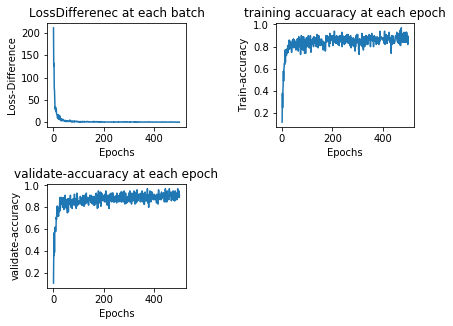

for a two hidden layer with no:of hidden nodes h1: 15 and h2: 25
Step 500, Minibatch Loss= 0.2365, Training Accuracy= 0.960
Step 500, Minibatch Loss= 0.4203, validation Accuracy= 0.900
Testing Accuracy: 0.8591


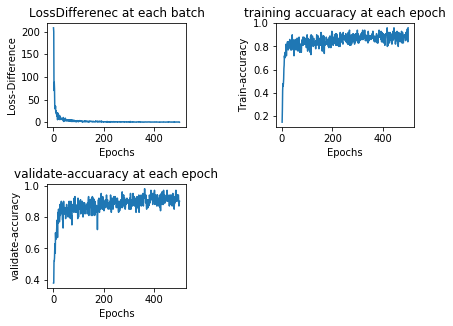

for a two hidden layer with no:of hidden nodes h1: 25 and h2: 15
Step 500, Minibatch Loss= 0.7098, Training Accuracy= 0.870
Step 500, Minibatch Loss= 0.4437, validation Accuracy= 0.880
Testing Accuracy: 0.8666


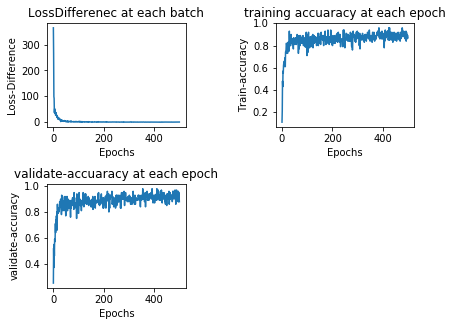

for a two hidden layer with no:of hidden nodes h1: 25 and h2: 25
Step 500, Minibatch Loss= 0.3860, Training Accuracy= 0.890
Step 500, Minibatch Loss= 0.4146, validation Accuracy= 0.920
Testing Accuracy: 0.8747


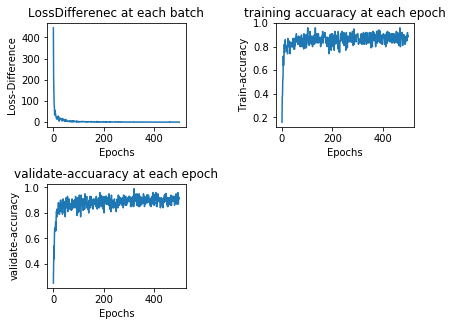

In [104]:
#Grid search for model 2 with 2 hidden layers

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 100
display_step = 1
model_path = "/tmp/model.ckpt"

# Network Parameters
n_hidden_1 = [15,25] # 1st layer number of neurons
n_hidden_2 = [15,25] # 2nd layer number of neurons
for hidden1 in n_hidden_1:
    for hidden2 in n_hidden_2:
        print("for a two hidden layer with no:of hidden nodes h1:" , hidden1 ,"and h2:" ,hidden2)
        num_input = 784 # MNIST data input (img shape: 28*28)
        num_classes = 10 # MNIST total classes (0-9 digits)
        # tf Graph input
        X = tf.placeholder("float", [None, num_input])
        Y = tf.placeholder("float", [None, num_classes])
        # Store layers weight & bias
        weights = {
            'h1': tf.Variable(tf.random_normal([num_input, hidden1])),
            'h2': tf.Variable(tf.random_normal([hidden1, hidden2])),
            'out': tf.Variable(tf.random_normal([hidden2, num_classes]))
        }
        biases = {
            'b1': tf.Variable(tf.random_normal([hidden1])),
            'b2': tf.Variable(tf.random_normal([hidden2])),
            'out': tf.Variable(tf.random_normal([num_classes]))
        }
        # Construct model
        logits = neural_net2(X)
        # Define loss and optimizer
        loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=logits, labels=Y))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        train_op = optimizer.minimize(loss_op)
        validate_op = optimizer.minimize(loss_op)
        # Evaluate model (with test logits, for dropout to be disabled)
        correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        # Initialize the variables (i.e. assign their default value)
        init = tf.global_variables_initializer()
        # Start training
        with tf.Session() as sess:
            lossDifference = []
            epochs = np.arange(1,501,1)
            train_accuracy = []
            validate_accuracy =[]
            # Run the initializer
            sess.run(init)
            for step in range(1, num_steps+1):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                batch_x1, batch_y1 = mnist.validation.next_batch(batch_size)
                # Run optimization op (backprop)
                sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
                if step % display_step == 0 or step == 1:
                    # Calculate batch loss and accuracy
                    loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y})
                    lossdiff = loss
                    lossDifference = np.append(lossDifference,lossdiff)
                    train_accuracy = np.append(train_accuracy,acc)
                sess.run(validate_op, feed_dict={X: batch_x1, Y: batch_y1})
                if step % display_step == 0 or step == 1:
                    # Calculate batch loss and accuracy
                    loss1, acc1 = sess.run([loss_op, accuracy], feed_dict={X: batch_x1,Y: batch_y1})
                    validate_accuracy = np.append(validate_accuracy,acc1)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            print("Step " + str(step) + ", Minibatch Loss= " + \
                "{:.4f}".format(loss1) + ", validation Accuracy= " + \
                "{:.3f}".format(acc1))
            
            print("Testing Accuracy:", \
            sess.run(accuracy, feed_dict={X: mnist.test.images,
                                          Y: mnist.test.labels}))
            plt.figure(1)
            plt.subplot(221)
            plt.plot(epochs,lossDifference,label = "lossDifference vs epochs")
            plt.title("LossDifferenec at each batch")
            #Label the X and Y axes
            plt.xlabel("Epochs")
            plt.ylabel("Loss-Difference")
            plt.subplot(222)
            plt.plot(epochs,train_accuracy,label = "training accuracy vs epochs")
            plt.title("training accuaracy at each epoch")
            #Label the X and Y axes
            plt.xlabel("Epochs")
            plt.ylabel("Train-accuracy")
    
            plt.subplot(223)
            plt.plot(epochs,validate_accuracy,label = "validation-accuracy vs epochs")
            plt.title("validate-accuaracy at each epoch")
            #Label the X and Y axes
            plt.xlabel("Epochs")
            plt.ylabel("validate-accuracy")
            plt.subplots_adjust(top=0.92, bottom=0.00090, left=0.10, right=0.95, hspace=0.55,wspace=0.65)
            plt.show()
    
   
    
    

# The resulting Intuition is that accuracy of the training set increases with the number of hidden layers. That is network with 2 hidden layers provide a better accuracy when compared to network with single hidden layer. Similarly the accuracy improves when there are are more number of hidden neurons in each hidden layer.
